In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)

In [3]:
dataset_dir = "C:\\Users\\creva\\Desktop\\P1Project\\P1-Project\\P1-Project\\ImageClassification-main\\chest_xray"
train_dir = r"C:\Users\creva\Desktop\P1Project\P1-Project\P1-Project\ImageClassification-main\chest_xray\train"
val_dir = r"C:\Users\creva\Desktop\P1Project\P1-Project\P1-Project\ImageClassification-main\chest_xray\val"
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  
    subset='training'
)

Found 4173 images belonging to 2 classes.


In [4]:
validation_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 2 images belonging to 2 classes.


In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [6]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

In [8]:
model = Model(inputs=base_model.input, outputs=x)


In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/5


C:\Users\creva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


130/130 ━━━━━━━━━━━━━━━━━━━━ 923s 7s/step - accuracy: 0.8586 - loss: 0.3249 - val_accuracy: 0.5000 - val_loss: 1.3388
Epoch 2/5
  1/130 ━━━━━━━━━━━━━━━━━━━━ 14:09 7s/step - accuracy: 0.9062 - loss: 0.1864

C:\Users\creva\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9062 - loss: 0.1864 - val_accuracy: 0.5000 - val_loss: 1.2759
Epoch 3/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 835s 6s/step - accuracy: 0.9424 - loss: 0.1547 - val_accuracy: 0.5000 - val_loss: 1.3170
Epoch 4/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9375 - loss: 0.1120 - val_accuracy: 0.5000 - val_loss: 1.7549
Epoch 5/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 1318s 10s/step - accuracy: 0.9549 - loss: 0.1283 - val_accuracy: 0.5000 - val_loss: 2.1441


In [11]:
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.where(Y_pred > 0.5, 1, 0)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Confusion Matrix
[[0 1]
 [0 1]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\creva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\creva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\creva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [12]:
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

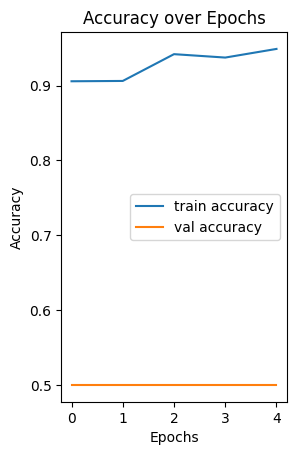

In [13]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


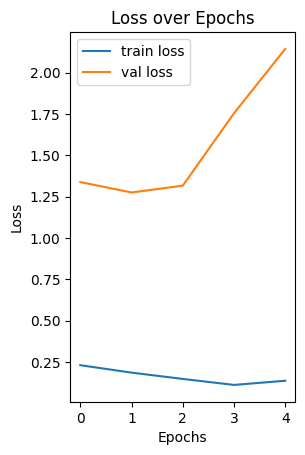

In [16]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.save('xray_classification_model.h5')



In [18]:
import cv2
import numpy as np
import tensorflow.keras.backend as K

In [19]:
def get_gradcam_heatmap(model, img_array, last_conv_layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]
    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

In [27]:
import os
image_folder = r"C:\Users\creva\Desktop\P1Project\P1-Project\P1-Project\ImageClassification-main\chest_xray\train"
print(os.listdir(image_folder))


['NORMAL', 'PNEUMONIA']


In [32]:
img = cv2.imread(r"C:\Users\creva\Desktop\P1Project\P1-Project\P1-Project\ImageClassification-main\chest_xray\__MACOSX\chest_xray\test\PNEUMONIA")
if img is None:
    print("Error: Image not found or unable to read.")
else:
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    heatmap = get_gradcam_heatmap(model, img, 'block5_conv3')

    plt.matshow(heatmap)
    plt.show()


Error: Image not found or unable to read.
